<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-3/aulas/notebooks/aula_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação

Este é o primeiro notebook do módulo 3 do bootcamp de DataScience aplicada da Alura. [Este é o repositório do curso](https://github.com/matheus97eng/Bootcamp_Alura_2021). Neste módulo trabalharemos com a ferramenta `facebook prophet` para analisar séries temporais. Os dados trabalhados durante todo o módulo serão dados públicos do [governo de São Paulo](https://www.seade.gov.br/coronavirus/) sobre os **casos de corona vírus**. Os dados já foram retirados do site e disponibilizados pelo github da Alura no dia 18/05/2021, [neste repositório](https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip).

# Aula 1

## Obtendo os dados

In [ ]:
import pandas as pd

url = 'https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip?raw=true'
dados = pd.read_csv(url, compression='zip', sep=';')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


## Primeiras visualizações

Vamos analisar como alguns dados se comportam a longo do tempo. Agora, analisando o número de casos pela coluna "datahora".

Temos que tomar cuidado aqui. A coluna "datahora" está sendo interpretada como caracter pelo pandas, e não como tipo datetime.

In [ ]:
dados['datahora']

0         2020-02-25
1         2020-02-25
2         2020-02-25
3         2020-02-25
4         2020-02-25
             ...    
286173    2021-05-08
286174    2021-05-09
286175    2021-05-10
286176    2021-05-11
286177    2021-05-12
Name: datahora, Length: 286178, dtype: object

precisamos então transformar essa coluna para o tipo datetime, como faremos a seguir. O parâmetro `format` diz ao pandas como os parâmetros de datetime estão dispostos na string.

In [ ]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')
dados['datahora']

0        2020-02-25
1        2020-02-25
2        2020-02-25
3        2020-02-25
4        2020-02-25
            ...    
286173   2021-05-08
286174   2021-05-09
286175   2021-05-10
286176   2021-05-11
286177   2021-05-12
Name: datahora, Length: 286178, dtype: datetime64[ns]

Agora faremos um primeiro gráfico, analisando os casos de covid de todos os municípios de São Paulo.

ajustando alguns parâmetros do gráfico...

No handles with labels found to put in legend.


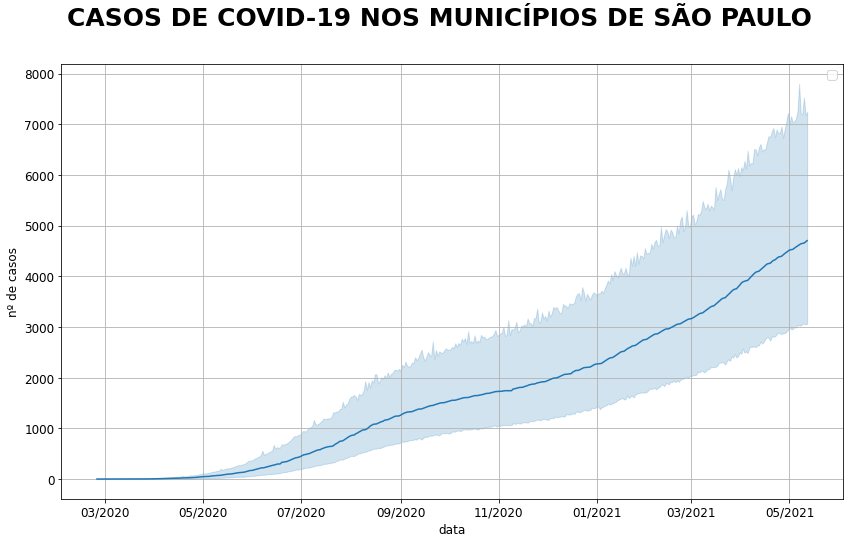

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# configurações gráficas
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (11,7)
monthyearFmt = mdates.DateFormatter('%m/%Y')    # formatação de datetime para o eixo x

plt.figure(figsize=(14,8))
ax = sns.lineplot(x='datahora', y='casos', data=dados)
plt.suptitle('Casos de COVID-19 nos municípios de São Paulo'.upper(), size=25, weight= 'bold')
plt.ylabel('nº de casos')
plt.xlabel('data')
ax.xaxis.set_major_formatter(monthyearFmt)    # formatando as ticks do eixo x
plt.grid()
plt.legend()
plt.show()

O que o gráfico está fazendo é um pouco de estatística em cima dos dados. Como colocamos bastante informação para o plot, para cada valor de x (data), temos vários valores de y (casos), um para cada município. O seaborn então calcula a média dos casos, representada pela linha azul escura. Na faixa azul clara, temos os máximos e os mínimos de gastos. Ou seja, o número de casos de todos os municípios de São Paulo estão contidos nessa faixa.

## Crescimento exponencial

A curva nos mostra o número de casos acumulativos nos municípios. Apesar de haver um crescimento menos acentuado entre Setembro e Novembro de 2020, a curva no geral se assemelha muito a um gráfico exponencial.

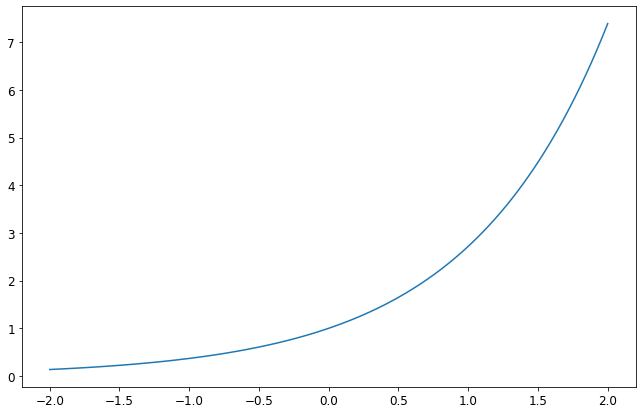

In [ ]:
import numpy as np

eixo_x = np.linspace(-2,2,100)
eixo_y = np.exp(eixo_x)

sns.lineplot(x=eixo_x, y=eixo_y)

O matplotlib também nos permite ver o gráfico com outras escalas nos eixos. Quando colocamos, por exemplo, no eixo y, a opção de escala em log, a tendência é vermos uma reta, pois os valores das escalas do eixo y estão crescendo exponencialmente. 

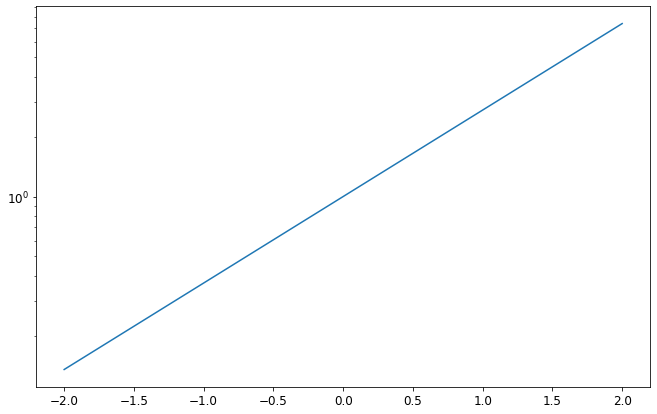

In [ ]:
sns.lineplot(x=eixo_x, y=eixo_y)

mpl.pyplot.yscale('log')

A ideia agora é esperar que um gráfico do número de casos com o eixo y na escala log se aproxime mais de uma linha reta, caso realmeente o comportamento do crescimento de casos seja exponencial.

Para plotar a linha de crescimento dos casos agora, **vamos escolher somente o município de São Paulo**.

In [ ]:
dados_sp = dados.query('nome_munic == "São Paulo"')
print(dados_sp.shape)
dados_sp.head()

(443, 26)


,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9


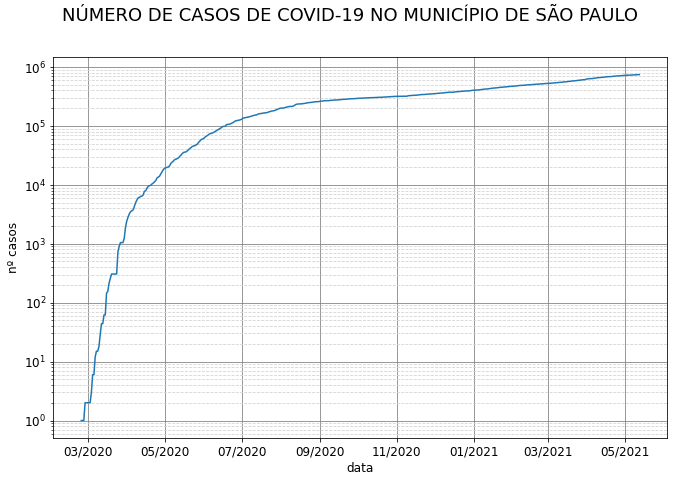

In [ ]:
ax = sns.lineplot(x='datahora', y='casos', data=dados_sp)
mpl.pyplot.yscale('log')
monthyearFmt = mdates.DateFormatter('%m/%Y')    # formatação de datetime para o eixo x
ax.xaxis.set_major_formatter(monthyearFmt)
plt.grid(which='major', color='gray')
plt.grid(which='minor', linestyle='--', color='lightgray')

plt.suptitle('Número de casos de covid-19 no município de São Paulo'.upper(), size=18)
plt.xlabel('data')
plt.ylabel('nº casos')
plt.show()

Apesar da curva não ser toda uma reta, na maioria dos trechos, é possível verificar uma aproximação de algumas retas, com diferentes inclinações. Essa inclinações foram diminuindo ao longo do tempo. Isso significa que o comportamento dos casos de covid acumulados ao longo do tempo se aproxima de curvas exponenciais, mas que vão ficando cada vez menos abruptas.

## Taxa de crescimento e média móvel

Agora iremos trabalhar com o número de casos novos diários e verificar como é o comportamento ao longo do tempo.

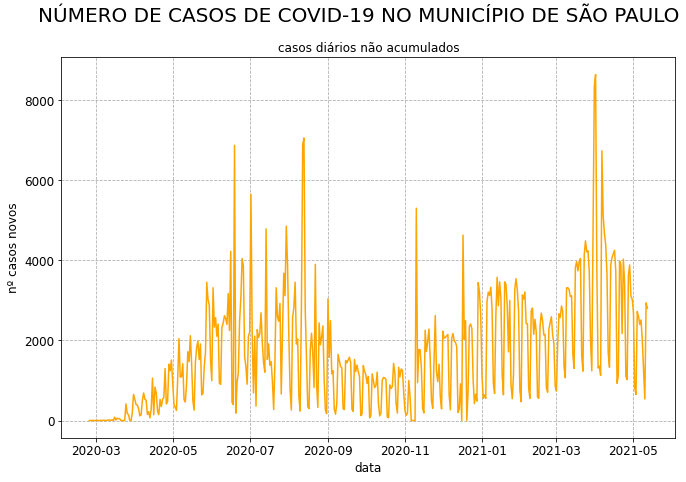

In [ ]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp, color='orange')

plt.suptitle('Número de casos de covid-19 no município de São Paulo'.upper(), size=20)
plt.title('casos diários não acumulados', size=12)
plt.xlabel('data')
plt.ylabel('nº casos novos')
plt.grid(linestyle='--')

monthyearFmt = mdates.DateFormatter('%m/%Y')    # formatação de datetime para o eixo x
ax.xaxis.set_major_formatter(monthyearFmt)

Observamos muitos picos, dias onde o número de casos é baixo e dias onde o número de casos é muito alto. Antes de entrar em questões do porquê esse gráfico ter tantas oscilações, vamos analisar uma ferramenta do pandas chamada `diff()`. Ela retorna as diferenças dos valores entre elementos do dataframe. Por padrão, ela calcula a diferença do elemento anterior nas linhas.

Usando um dataframe como exemplo...

In [ ]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))
dados_exemplo

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


In [ ]:
# fazendo a diferenciação:

dados_exemplo['diff'] = dados_exemplo[0].diff()

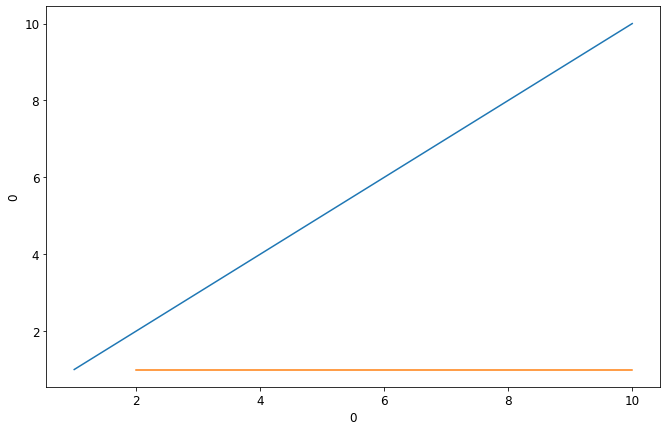

In [ ]:
# comparando a curva com a diferencial

sns.lineplot(x=0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y='diff', data=dados_exemplo)

A linha laranja é uma reta y=1, pois, como a linha azul é uma reta, as diferenças entre os valores e seus antecessores é sempre a mesma, igual a 1.

Vamos então fazer as diferenciações nos dados do município de São Paulo e ver o comportamento dos gráficos.

In [ ]:
dados_sp.loc[:,'taxa_de_crescimento_casos'] = dados_sp.loc[:,'casos_novos'].diff()
dados_sp.loc[:,'taxa_de_crescimento_obitos'] = dados_sp.loc[:,'obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
dados_sp

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,178,"2,384988e+02","114,5714286","0,0385126596",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,38,"2,388190e+02","116,7142857","0,0384970571",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,17,"2,389622e+02","114,1428571","0,0384920204",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,219,"2,408072e+02","120,0000000","0,0386350212",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0


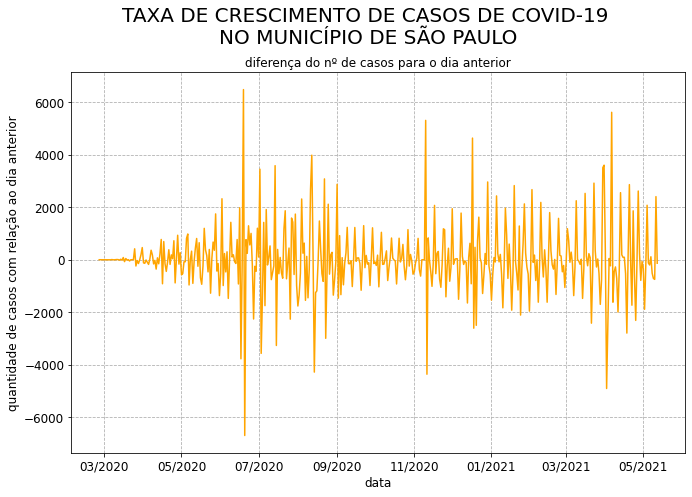

In [ ]:
ax = sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp, color='orange')

plt.suptitle('Taxa de crescimento de casos de covid-19 \nno município de São Paulo'.upper(), size=20, y=1.01)
plt.title('diferença do nº de casos para o dia anterior', size=12)
plt.xlabel('data')
plt.ylabel('quantidade de casos com relação ao dia anterior')
plt.grid(linestyle='--')

monthyearFmt = mdates.DateFormatter('%m/%Y')    # formatação de datetime para o eixo x
ax.xaxis.set_major_formatter(monthyearFmt)

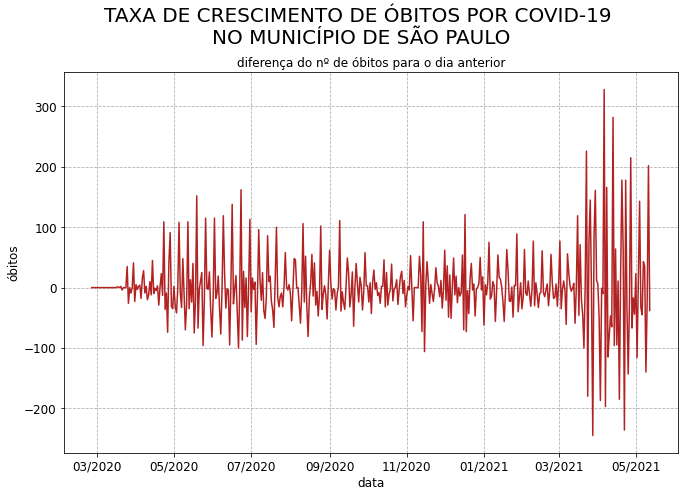

In [ ]:
ax = sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp, color='firebrick')

plt.suptitle('Taxa de crescimento de óbitos por covid-19 \nno município de São Paulo'.upper(), size=20, y=1.01)
plt.title('diferença do nº de óbitos para o dia anterior', size=12)
plt.xlabel('data')
plt.ylabel('óbitos')
plt.grid(linestyle='--')

monthyearFmt = mdates.DateFormatter('%m/%Y')    # formatação de datetime para o eixo x
ax.xaxis.set_major_formatter(monthyearFmt)

Agora, o mesmo gráfico de casos, mas em barras:

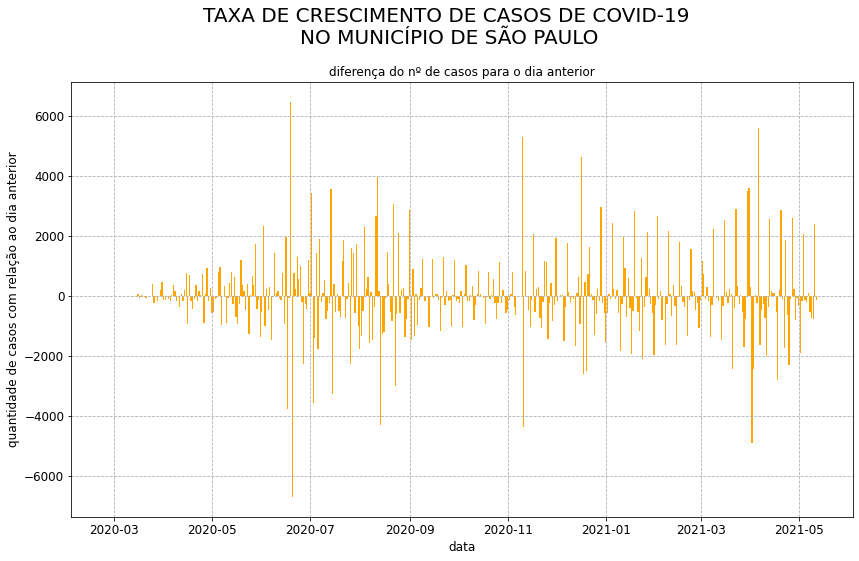

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
ax = plt.bar(x=dados_sp['datahora'], height=dados_sp['taxa_de_crescimento_casos'], color='orange')
#ax = sns.barplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)

plt.suptitle('Taxa de crescimento de casos de covid-19 \nno município de São Paulo'.upper(), size=20, y=1.01)
plt.title('diferença do nº de casos para o dia anterior', size=12)
plt.xlabel('data')
plt.ylabel('quantidade de casos com relação ao dia anterior')
plt.grid(which='major', linestyle='--')

#monthyearFmt = mdates.DateFormatter('%m/%Y')    # formatação de datetime para o eixo x
#ax.xaxis.set_major_formatter(monthyearFmt)
plt.show()

### Seprando períodos menores

Vamos analisar agora somente os dados de 2021. Para isso, precisamos de uma nova coluna no dataframe que nos informe qual o ano respectivo da informação dada.

In [ ]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
dados_sp.query('ano == 2021').head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,16,"1,322279e+02","35,1428571","0,0389613614",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-1540.0,-62.0,2021
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,21,"1,324048e+02","37,1428571","0,0389600087",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-564.0,5.0,2021
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,9,"1,324806e+02","37,4285714","0,0389208589",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,84.0,-12.0,2021
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,18,"1,326323e+02","38,0000000","0,0389123428",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,-86.0,9.0,2021
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,93,"1,334158e+02","42,1428571","0,0388559146",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,2430.0,75.0,2021


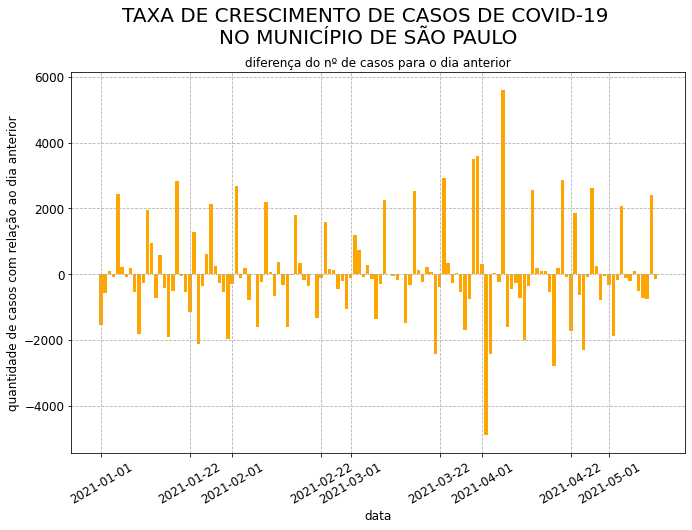

In [ ]:
ax = plt.bar(x=dados_sp.query('ano == 2021')['datahora'], height=dados_sp.query('ano == 2021')['taxa_de_crescimento_casos'], color='orange')

plt.suptitle('Taxa de crescimento de casos de covid-19 \nno município de São Paulo'.upper(), size=20, y=1.01)
plt.title('diferença do nº de casos para o dia anterior', size=12)
plt.xlabel('data')
plt.ylabel('quantidade de casos com relação ao dia anterior')
plt.grid(which='major', linestyle='--')

plt.xticks(rotation=30)
#monthyearFmt = mdates.DateFormatter('%m/%Y')    # formatação de datetime para o eixo x
#ax.xaxis.set_major_formatter(monthyearFmt)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=30, offset=0))
plt.show()

### Média móvel

Escolhemos calcular a média móvel para o número de casos e óbitos a cada semana. Ou seja, estamos fazendo a média semanal dos valores. Os valores dessas médias serão armazenados em um nova coluna e serão consideradas as médias dos **últimos** 7 dias. Ou seja, para o dia de sábado, informaremos a média dos valores do último domingo até o sábado.

Para calcularmos essas médias, utilizaremos a função `rolling`, que literalmente rola pelos valores em uma janela de x em x espaços por vez.

In [ ]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()
dados_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano,media_movel_casos,media_movel_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,2020,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,2020,NaN,NaN
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,2020,NaN,NaN


Agora podemos comparar a curva dos novos casos com uma curva mais suave, da média móvel de 7 dias.

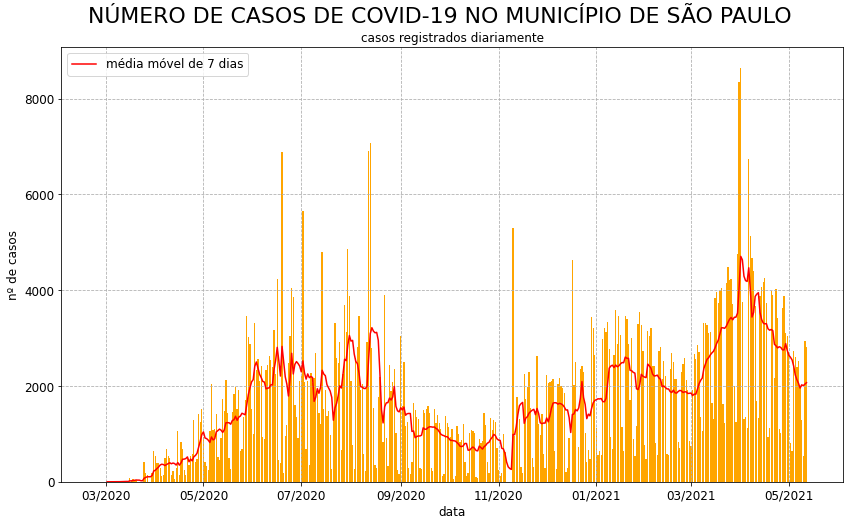

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(x='datahora', height='casos_novos', data=dados_sp, color='orange')
ax = sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp, color='red', label='média móvel de 7 dias')

plt.suptitle('Número de casos de covid-19 no município de São Paulo'.upper(), size=22, y=0.95)
plt.title('casos registrados diariamente', size=12)
plt.xlabel('data')
plt.ylabel('nº de casos')
plt.grid(which='major', linestyle='--')
plt.legend

monthyearFmt = mdates.DateFormatter('%m/%Y')    # formatação de datetime para o eixo x
ax.xaxis.set_major_formatter(monthyearFmt)

plt.show()

## Correlação e função de correlação

É de se esperar que o número de casos registrados esteja relacionado com o número de óbitos por covid. Mas o quanto estão relacionados? Podemos obter uma visualização gráfica dessa correlação usando o lineplot ou o scatterplot.

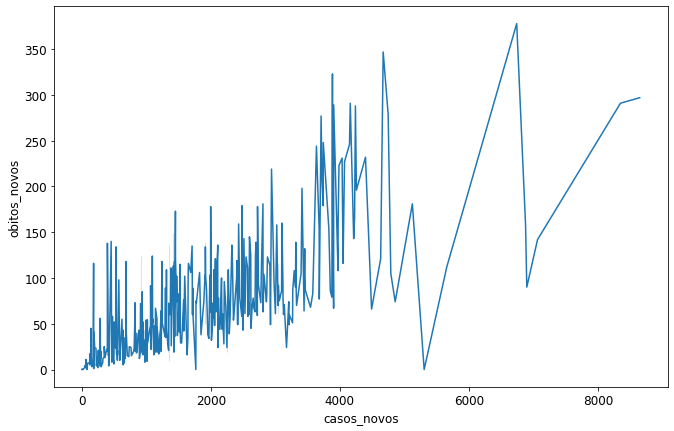

In [ ]:
# lineplot
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_sp)

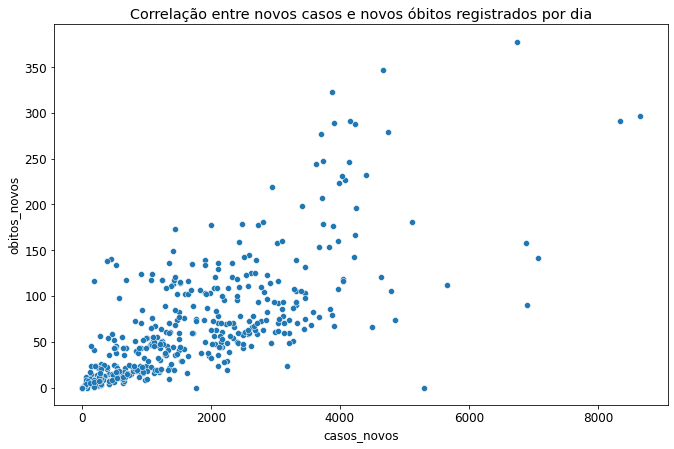

In [ ]:
# scatterplot

sns.scatterplot(x='casos_novos', y='obitos_novos', data=dados_sp)
plt.title('Correlação entre novos casos e novos óbitos registrados por dia')
plt.show()

## Sazonalidade

Casos de covid costumam ser mais registrados em dias do meio de semana, onde há mais pessoas trabalhando em hospitais e laboratórios. Isso nos leva a crer que há uma certa sazonalidade no número de novos casos registrados, sendo que todo final de semana os números serão menores. Para observar isso, vamos plotar o número de casos para apenas um mês. 

In [ ]:
dados_sp_01_2021 = dados_sp.query('mes == 1 & ano == 2021')
dados_sp_02_2021 = dados_sp.query('mes == 2 & ano == 2021')

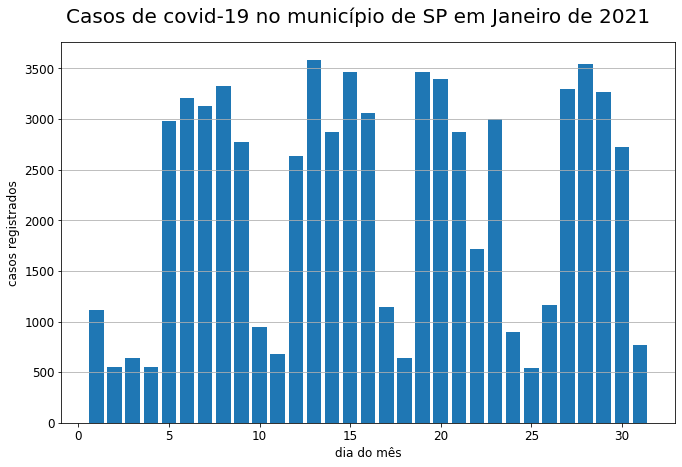

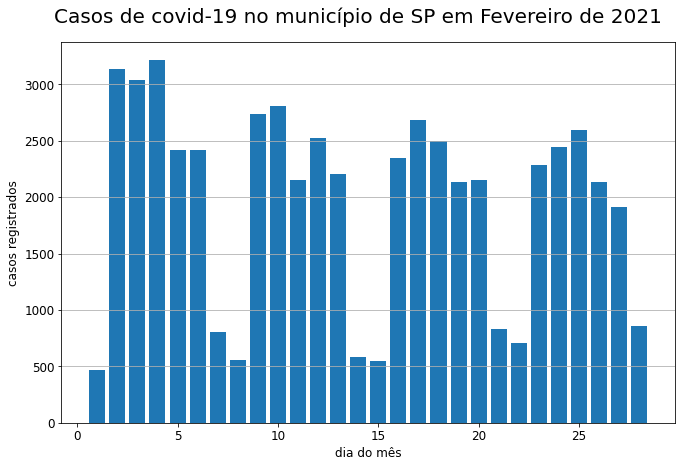

In [ ]:
# janeiro tem um espaço de 31 dias:
plt.bar(np.linspace(1,31,31), dados_sp_01_2021['casos_novos'])
plt.suptitle('Casos de covid-19 no município de SP em Janeiro de 2021', size=20, y=0.95)
plt.ylabel('casos registrados')
plt.xlabel('dia do mês')
plt.grid(axis='y')
plt.show()    # forçando o python a plotar esse gráfico

# já fevereiro tem um espaço de 28 dias em 2021:
plt.bar(np.linspace(1,28,28), dados_sp_02_2021['casos_novos'])
plt.suptitle('Casos de covid-19 no município de SP em Fevereiro de 2021', size=20, y=0.95)
plt.ylabel('casos registrados')
plt.xlabel('dia do mês')
plt.grid(axis='y')
plt.show()

### Função de correlação para verificar sazonalidade

O próprio pandas nos dá uma ferramenta que permite verificar a função de autocorrelação de uma série temporal, a `autocorrelation_plot`, do módulo `pandas.plotting`.

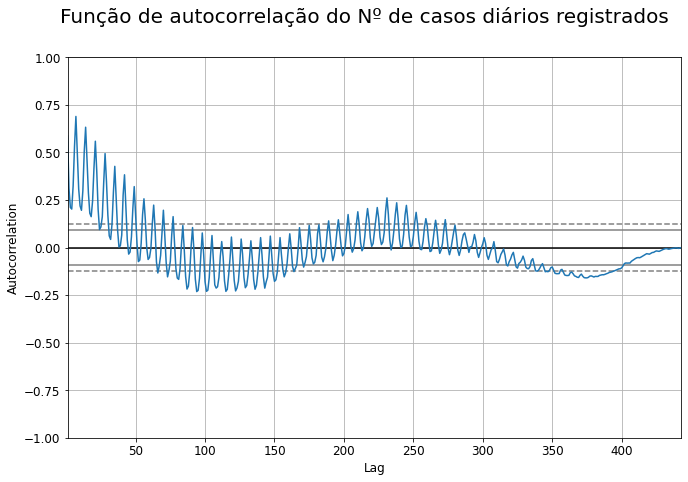

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dados_sp['casos_novos'])
plt.suptitle('Função de autocorrelação do Nº de casos diários registrados', size=20)
plt.show()

Uma função de autocorrelação de uma série temporal faz uma correlação da série com ela mesma. Se verificarmos a autocorrelação de qualquer coisa, naturalmente teríamos como resultado **1**. Mas com o objetivo de verificar o **comportamento temporal** da série, a correlação é verificada entre os próprios valores da série, através dos **lags**. Exemplificando com os dados que temos, a primeira correlação calculada, de **lag = 1**, calcula a correlação entre a série temporal e uma cópia dela, **com a diferença de que os valores da cópia começam a partir de um dia posterior à série original**. No caso de lag = 400, é a mesma ideia, só que com um deslocamento de 400 dias.

Perceba que, no gráfico acima, a medida que os lags vão aumentando, a autocorrelação vai diminuindo. Isso significa que, ao passar de muito tempo da pandemia, os números de casos não se comparam muito bem.

Se gerarmos uma série temporal por meio de uma função aleatória, o gráfico da função de autocorrelação seria uma linha sempre próxima de y = 0, já que, por ser aleatória, essa série temporal não apresenta nenhum tipo de sazonalidade.

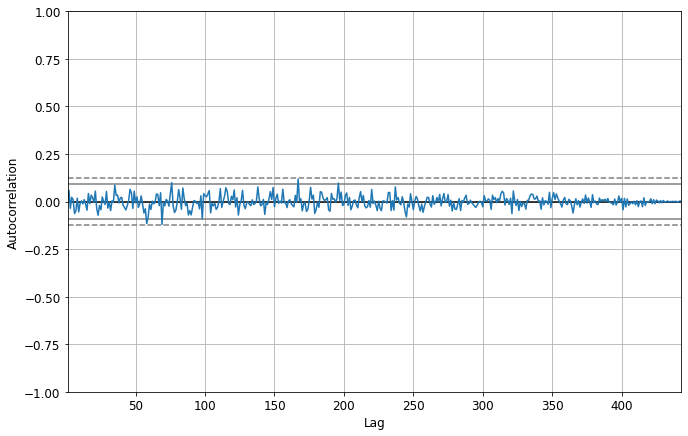

In [ ]:
aleatorio = np.random.rand(443)
autocorrelation_plot(aleatorio)

Agora, um exemplo de dados com uma sazonalidade perfeita, pois a função seno é periódica.

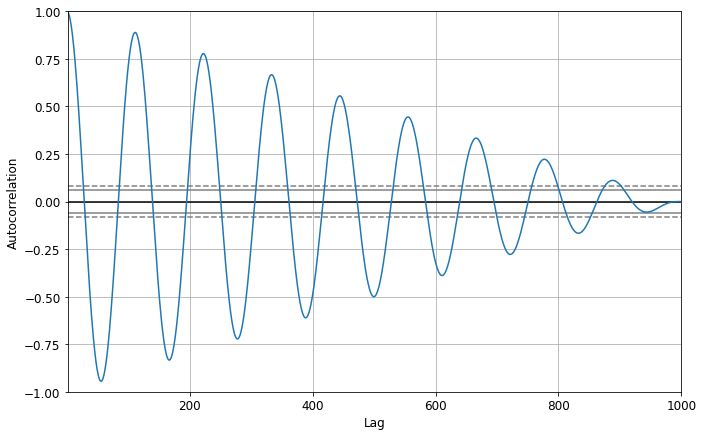

In [ ]:
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
s = pd.Series(np.sin(spacing))
pd.plotting.autocorrelation_plot(s)

## Desafios:

Desafio 01: Um notebook sem warnings

Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.

Desafio 03: Fazer melhorias nos gráficos.

Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

Desafio 06: Função de correlação cruzada dos óbitos e casos.

Desafio 07: Estudar outros municípios.

### Desafio 01: Um notebook sem warnings

Usando os comandos

```
import warnings
warnings.filterwarnings('ignore')
```

Todos os Warnings serão ignorados

### Desafio 02: Pico das taxa de casos novos coincide com taxa dos óbitos novos?

Para descobrir, vamos plotar junto os 2 gráficos das taxas

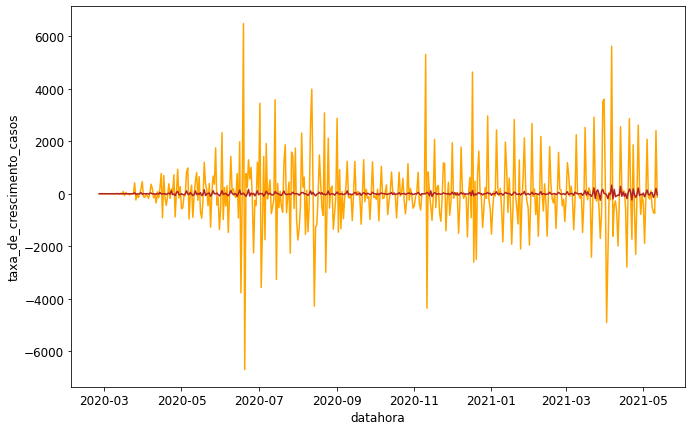

In [ ]:
ax1 = sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp, color='orange')
ax2 = sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp, color='firebrick')

Como esperado, o número de óbitos é bem maior do que o número de casos, a ponto de dificultar a visualização para comparação dos 2 dados. Para contornar essa dificuldade, vamos plotar os dados num mesmo gráfico, mas com 2 eixos y diferentes.

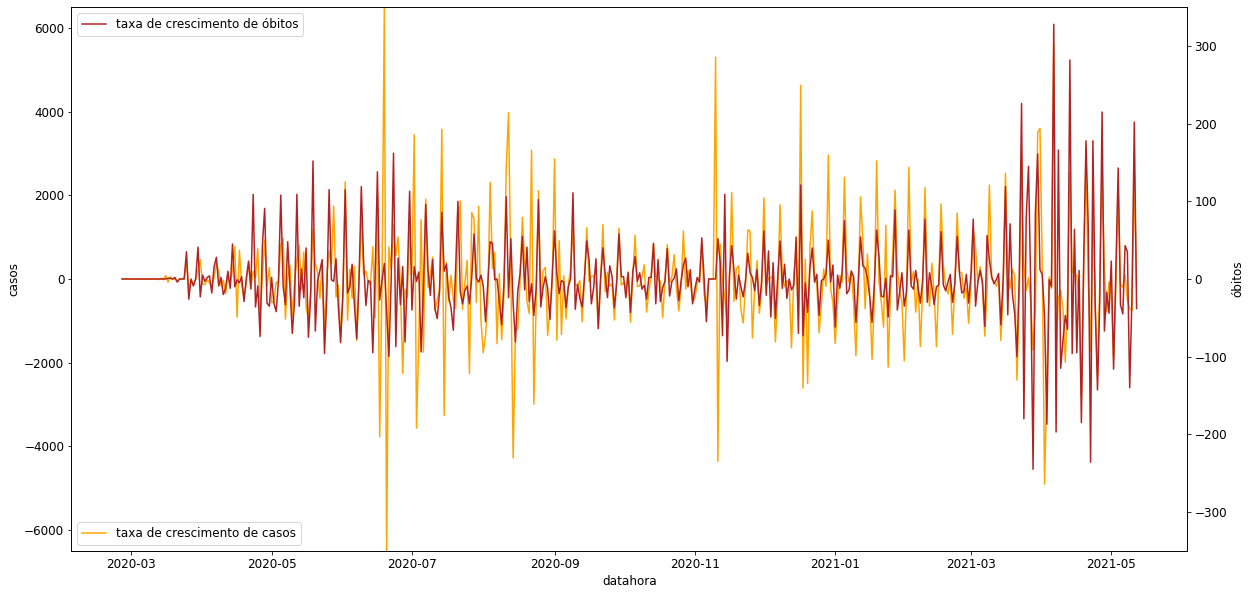

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp, color='orange', ax=ax1, label='taxa de crescimento de casos')
ax1.set_ylabel('casos')
ax1.set_ylim(-6500,6500)

ax2 = ax1.twinx()     # cria uma segunda variável para o lineplot dos óbitos, que compartilha o eixo x com o lineplot de casos
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp, color='firebrick', ax=ax2, label='taxa de crescimento de óbitos')
ax2.set_ylabel('óbitos')
ax2.set_ylim(-350,350)

#fig.tight_layout()  
ax1.legend(loc=3)
plt.show()

Os picos, em sua maioria, estão coincidindo! Algumas vezes, proporcionalmente, os picos dos casos se sobrepoem aos de óbitos. Em outras, proporcionalmente, os picos de óbitos que se sobrepoem, como visto no final do gráfico.

Para verificar melhor o comportamento dos picos, seria melhor restringir a análise a um mês somente. Vamos fazer para o mês de Janeiro.

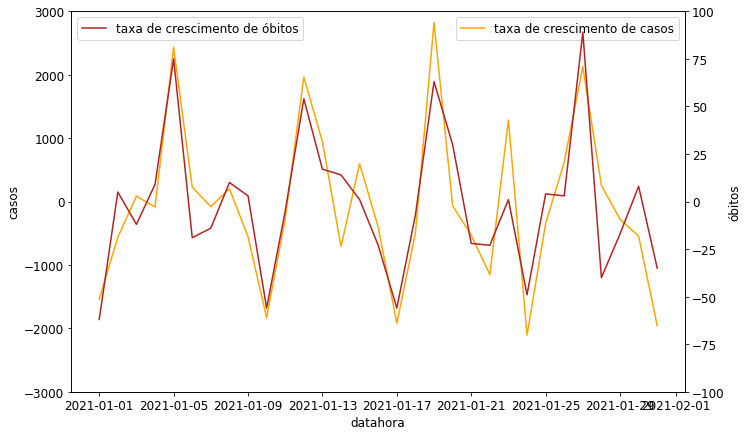

In [ ]:
fig, ax1 = plt.subplots()
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp_01_2021, color='orange', ax=ax1, label='taxa de crescimento de casos')
ax1.set_ylabel('casos')
ax1.set_ylim(-3000,3000)

ax2 = ax1.twinx()     # cria uma segunda variável para o lineplot dos óbitos, que compartilha o eixo x com o lineplot de casos
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp_01_2021, color='firebrick', ax=ax2, label='taxa de crescimento de óbitos')
ax2.set_ylabel('óbitos')
ax2.set_ylim(-100,100)

#fig.tight_layout()    
plt.show()

Agora é possível ver melhor quando as linhas diferem um pouco no comportamento dos picos, mas na grande maioria, os picos coincidem.

### Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.



In [ ]:
dados_sp.reset_index(inplace=True)
dados_sp

,index,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano,media_movel_casos,media_movel_obitos
0,562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,2020,NaN,NaN
1,1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN
2,1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN
3,2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,2020,NaN,NaN
4,3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,178,"2,384988e+02","114,5714286","0,0385126596",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0,2021,1956.571429,114.571429
439,283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,38,"2,388190e+02","116,7142857","0,0384970571",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0,2021,2024.142857,116.714286
440,284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,17,"2,389622e+02","114,1428571","0,0384920204",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0,2021,2008.142857,114.142857
441,285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,219,"2,408072e+02","120,0000000","0,0386350212",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0,2021,2039.142857,120.000000


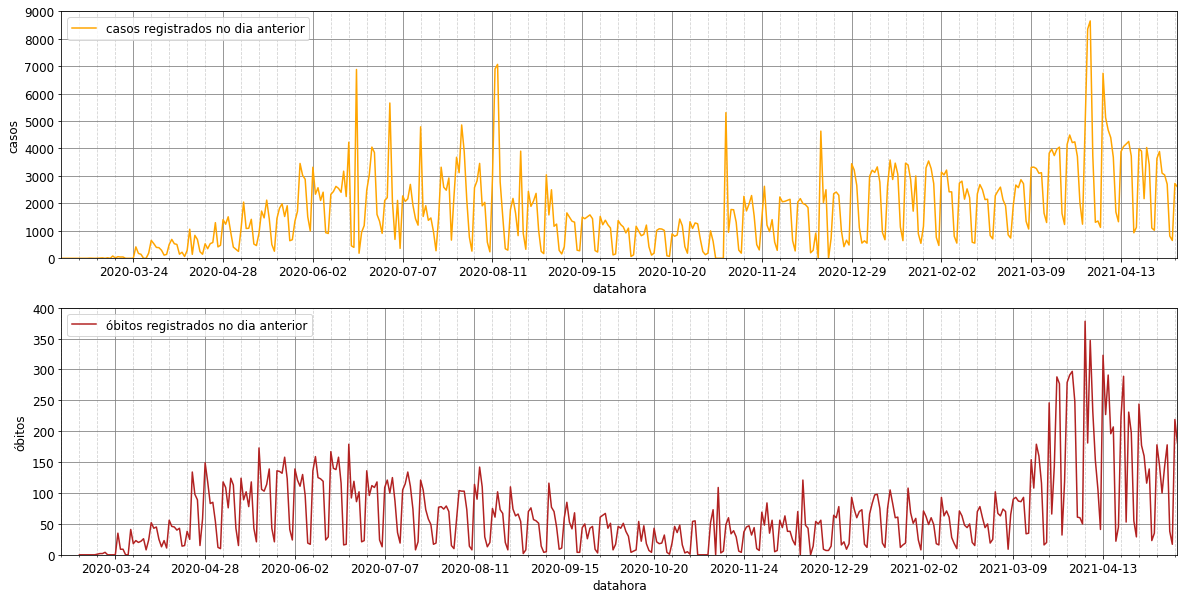

In [ ]:
import matplotlib.dates as mdates
days_minor = mdates.DayLocator(interval=7)
days_major = mdates.DayLocator(interval=35)

fig, axis = plt.subplots(2,1, figsize=(20,10))
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp, color='orange', ax=axis[0], label='casos registrados no dia anterior')
axis[0].set_ylabel('casos')
axis[0].set_ylim(0,9000)
axis[0].set_xlim(dados_sp['datahora'].values[0], dados_sp['datahora'].values[-8])

sns.lineplot(x='datahora', y='obitos_novos', data=dados_sp.loc[14:], color='firebrick', ax=axis[1], label='óbitos registrados no dia anterior')
axis[1].set_ylabel('óbitos')
axis[1].set_ylim(0,400)
axis[1].set_xlim(dados_sp['datahora'].values[7], dados_sp['datahora'].values[-1])

axis[0].xaxis.set_major_locator(days_major)
axis[0].xaxis.set_minor_locator(days_minor)
axis[0].grid(which='major', color='gray')
axis[0].grid(which='minor', linestyle='--', color='lightgray')
axis[1].xaxis.set_major_locator(days_major)
axis[1].xaxis.set_minor_locator(days_minor)
axis[1].grid(which='major', color='gray')
axis[1].grid(which='minor', linestyle='--', color='lightgray')
plt.show()

### Desafio 03: Fazer melhorias nos gráficos.

Os gráficos já foram alterados em relação ao que foi feito na aula. Foram colocadas legendas, títulos e optei por estabelecer a cor laranja para representar o número de casos de covid e a cor vermelha para representar o número de óbitos, facilitando a identificação nos gráficos.

### Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

O gráfico de barras de óbitos junto com a média móvel é gerado a seguir. O gráfico de casos de covid já foi gerado em barras.

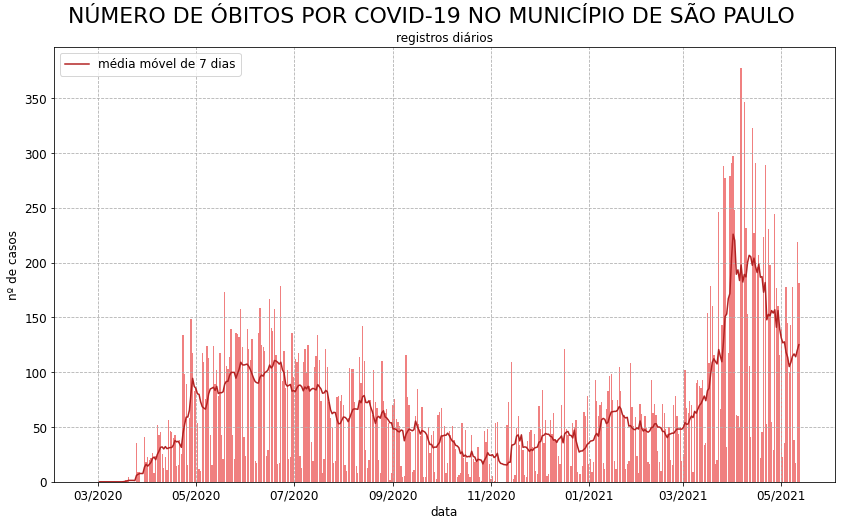

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(x='datahora', height='obitos_novos', data=dados_sp, color='lightcoral')
ax = sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp, color='firebrick', label='média móvel de 7 dias')

plt.suptitle('Número de óbitos por covid-19 no município de São Paulo'.upper(), size=22, y=0.95)
plt.title('registros diários', size=12)
plt.xlabel('data')
plt.ylabel('nº de casos')
plt.grid(which='major', linestyle='--')
plt.legend

monthyearFmt = mdates.DateFormatter('%m/%Y')    # formatação de datetime para o eixo x
ax.xaxis.set_major_formatter(monthyearFmt)

plt.show()

# Gerando a saída do dataframe `dados_sp` para outras aulas.

In [ ]:
dados_sp.to_csv('out_dados_sp.csv')